<a href="https://colab.research.google.com/github/rishicarter/Tensorflow_fundamentals/blob/main/03_Tensorflow_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-04-21 20:59:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.240, 142.251.45.112, 172.217.13.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   184MB/s    in 0.6s    

2022-04-21 20:59:25 (184 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip = zipfile.ZipFile('pizza_steak.zip')
zip.extractall()
zip.close()

In [ ]:
pizzasteak_dir = 'pizza_steak/train/'

In [ ]:
import os

for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} in {dirpath}')

There are 2 directories and 0 in pizza_steak
There are 2 directories and 0 in pizza_steak/test
There are 0 directories and 250 in pizza_steak/test/pizza
There are 0 directories and 250 in pizza_steak/test/steak
There are 2 directories and 0 in pizza_steak/train
There are 0 directories and 750 in pizza_steak/train/pizza
There are 0 directories and 750 in pizza_steak/train/steak


In [ ]:
num_steak_imgs_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_imgs_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names=np.array(sorted([item.name for item in data_dir.glob("*") if item.name.startswith(".")==False]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def viewRandImg(target_dir,target_class):
  target_folder=target_dir+target_class
  randImg = random.sample(os.listdir(target_folder),1)
  print(randImg)

  img=mpimg.imread(target_folder+'/'+randImg[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}')

  return img

['3020376.jpg']
Image shape: (512, 512, 3)


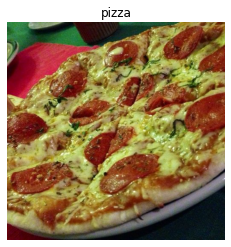

In [ ]:
img=viewRandImg(target_dir='pizza_steak/train/',
                target_class='pizza')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
valide_datagen= ImageDataGenerator(rescale=1./255)

train_dir='pizza_steak/train'
test_dir='pizza_steak/test'

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
valid_data=valide_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              seed=42,
                                              target_size=(224,224),
                                              class_mode='binary')

model1=tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
  tf.keras.layers.Conv2D(10,3,activation='relu'),
  tf.keras.layers.Conv2D(10,3,activation='relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
hist1=model1.fit(train_data,epochs=5,
                 steps_per_epoch=len(train_data),
                 validation_data=valid_data,
                 validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 250ms/step - loss: 0.5650 - accuracy: 0.7060 - val_loss: 0.3849 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 11s 244ms/step - loss: 0.4101 - accuracy: 0.8127 - val_loss: 0.3293 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3848 - accuracy: 0.8260 - val_loss: 0.3408 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 12s 246ms/step - loss: 0.3433 - accuracy: 0.8540 - val_loss: 0.3087 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 14s 289ms/step - loss: 0.2948 - accuracy: 0.8893 - val_loss: 0.3019 - val_accuracy: 0.8800


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
hist2=model2.fit(train_data,
                 epochs=5,
                 steps_per_epoch=len(train_data),
                 validation_data=valid_data,
                 validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 228ms/step - loss: 2.2391 - accuracy: 0.5167 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 235ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model3.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
hist3=model3.fit(train_data,epochs=5,
                 steps_per_epoch=len(train_data),
                 validation_data=valid_data,
                 validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 15s 310ms/step - loss: 2.5314 - accuracy: 0.6120 - val_loss: 0.5109 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 13s 276ms/step - loss: 0.8647 - accuracy: 0.6867 - val_loss: 1.1372 - val_accuracy: 0.5500
Epoch 3/5
47/47 [==============================] - 13s 276ms/step - loss: 0.5556 - accuracy: 0.7633 - val_loss: 0.8940 - val_accuracy: 0.5820
Epoch 4/5
47/47 [==============================] - 13s 285ms/step - loss: 0.5555 - accuracy: 0.7547 - val_loss: 0.8041 - val_accuracy: 0.7000
Epoch 5/5
47/47 [==============================] - 13s 272ms/step - loss: 0.6549 - accuracy: 0.7353 - val_loss: 0.6571 - val_accuracy: 0.7720


In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 100)               15052900  
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


['756655.jpg']
Image shape: (512, 512, 3)
['2885796.jpg']
Image shape: (512, 512, 3)


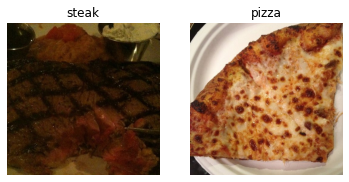

In [ ]:
## Binary class
plt.figure()
plt.subplot(1,2,1)
steak_img = viewRandImg(pizzasteak_dir,'steak')
plt.subplot(1,2,2)
pizza_img=viewRandImg(pizzasteak_dir,'pizza')

In [ ]:
# Preprocessing
train_dir=pizzasteak_dir
test_dir='pizza_steak/test/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            target_size=(224,224),
                                            class_mode='binary',
                                            batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Activation
from tensorflow.keras import Sequential

In [ ]:
model4= Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224,224,3)),
  Conv2D(10,3,activation='relu'),
  Conv2D(10,3,activation='relu'),
  Flatten(),
  Dense(1,activation='sigmoid')
])
model4.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
hist4=model4.fit(train_data,epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 248ms/step - loss: 0.6284 - accuracy: 0.6627 - val_loss: 0.4922 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 17s 373ms/step - loss: 0.3782 - accuracy: 0.8433 - val_loss: 0.3961 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.1831 - accuracy: 0.9367 - val_loss: 0.3894 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.0842 - accuracy: 0.9807 - val_loss: 0.6762 - val_accuracy: 0.7360
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.0275 - accuracy: 0.9973 - val_loss: 0.5806 - val_accuracy: 0.8020


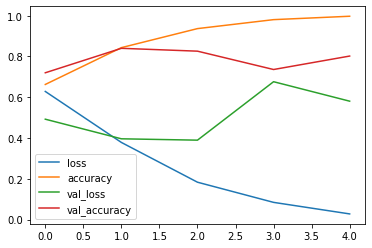

In [ ]:
import pandas as pd
pd.DataFrame(hist4.history).plot()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curve(hist):
  loss=hist.history['loss']
  val_loss= hist.history['val_loss']
  accuracy=hist.history['accuracy']
  val_accuracy=hist.history['val_accuracy']
  epochs=range(len(hist.history['loss']))

  plt.plot(epochs,loss,label='training loss')
  plt.plot(epochs,val_loss, label='val loss')
  plt.title('loss curve')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label='training accuracy')
  plt.plot(epochs,val_accuracy,label='val accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

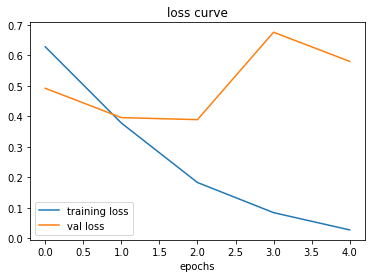

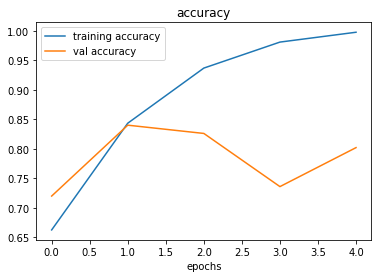

In [ ]:
plot_loss_curve(hist4)

In [ ]:
model5=Sequential([
  Conv2D(10,3,activation='relu',
         input_shape=(224,224,3)),
  MaxPool2D(pool_size=(2,2)),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation='sigmoid')
])

In [ ]:
model5.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 10)      

In [ ]:
hist5=model5.fit(train_data,epochs=5,
                 steps_per_epoch=len(train_data),
                 validation_data=test_data,
                 validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 202ms/step - loss: 0.5426 - accuracy: 0.7327 - val_loss: 0.4317 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4357 - accuracy: 0.7967 - val_loss: 0.3349 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4234 - accuracy: 0.8020 - val_loss: 0.3750 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3939 - accuracy: 0.8133 - val_loss: 0.3163 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3643 - accuracy: 0.8433 - val_loss: 0.3246 - val_accuracy: 0.8540


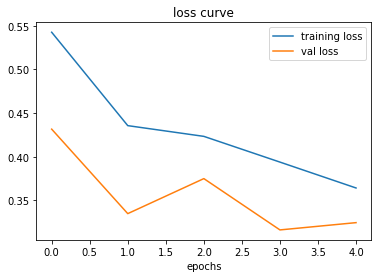

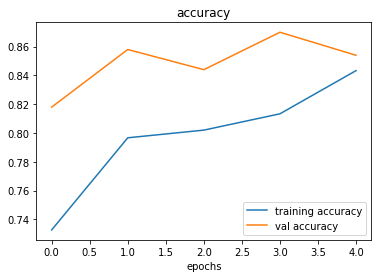

In [ ]:
plot_loss_curve(hist5)

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.0,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_augmented=train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='binary',
                                                                 shuffle=True)
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='binary',
                                          shuffle=True)
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
imgs,labels=train_data.next()
imgs_aug,labels_aug = train_data_augmented.next()

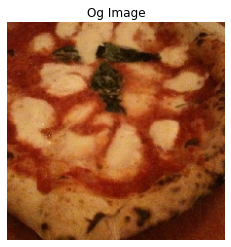

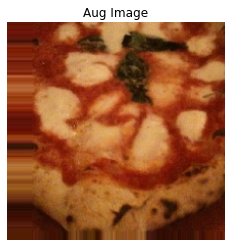

In [ ]:
import random
randnum = random.randint(0,32)
plt.imshow(imgs[randnum])
plt.title(f'Og Image')
plt.axis(False)
plt.figure()
plt.imshow(imgs_aug[randnum])
plt.title(f'Aug Image')
plt.axis(False);

In [ ]:
model6=Sequential([
  Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation='sigmoid')
])
model6.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
model6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 10)      

In [ ]:
hist6=model6.fit(train_data_augmented,
                 epochs=5,
                 steps_per_epoch=len(train_data_augmented),
                 validation_data=test_data,
                 validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6903 - accuracy: 0.5740 - val_loss: 0.6753 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6916 - accuracy: 0.5913 - val_loss: 0.6532 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6649 - accuracy: 0.6180 - val_loss: 0.5541 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6807 - accuracy: 0.6073 - val_loss: 0.5860 - val_accuracy: 0.6740
Epoch 5/5
47/47 [==============================] - 21s 453ms/step - loss: 0.6580 - accuracy: 0.6173 - val_loss: 0.5431 - val_accuracy: 0.6980


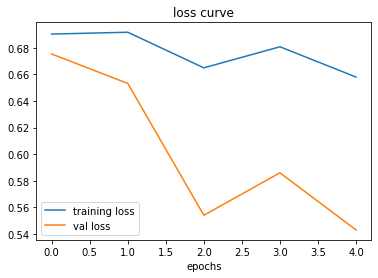

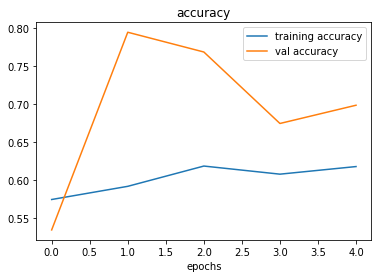

In [ ]:
plot_loss_curve(hist6)

In [ ]:
model7=Sequential()
model7.add(Conv2D(10,3,activation='relu',input_shape=(224,224,3)))
model7.add(MaxPool2D())
model7.add(Conv2D(10,3,activation='relu'))
model7.add(MaxPool2D())
model7.add(Conv2D(10,3,activation='relu'))
model7.add(MaxPool2D())
model7.add(Flatten())
model7.add(Dense(1,activation='sigmoid'))

model7.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
model7.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 26, 26, 10)      

In [ ]:
# Shuffle imgs
hist7=model7.fit(train_data_augmented,
                 epochs=5,
                 steps_per_epoch=len(train_data_augmented),
                 validation_data=test_data,
                 validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6577 - accuracy: 0.5907 - val_loss: 0.6205 - val_accuracy: 0.6320
Epoch 2/5
47/47 [==============================] - 21s 453ms/step - loss: 0.5768 - accuracy: 0.6933 - val_loss: 0.4362 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 21s 455ms/step - loss: 0.4935 - accuracy: 0.7607 - val_loss: 0.3780 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 21s 454ms/step - loss: 0.4939 - accuracy: 0.7707 - val_loss: 0.4047 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4533 - accuracy: 0.8013 - val_loss: 0.3285 - val_accuracy: 0.8640


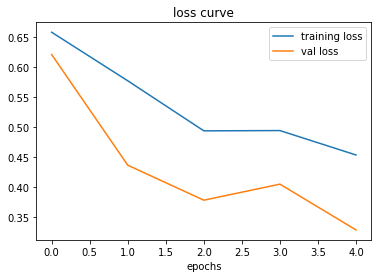

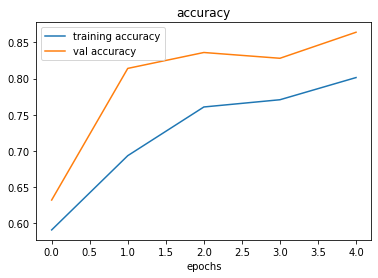

In [ ]:
plot_loss_curve(hist7)

In [ ]:
import matplotlib.image as mimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-04-21 21:57:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2022-04-21 21:57:31 (125 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



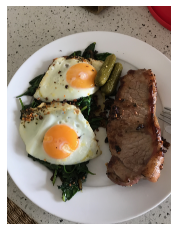

In [ ]:
steak=mimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  img=tf.expand_dims(img,axis=0)
  return img

In [ ]:
def pred_and_plt(model,filename,class_names):
  img=load_and_prep_image(filename)
  pred=model.predict(img)
  pred_class=class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

##Multiclass Classification

### Imports and declarations


In [ ]:
import zipfile
import os
import tensorflow as tf
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.image as mimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zipf = zipfile.ZipFile("10_food_classes_all_data.zip")
zipf.extractall()
zipf.close()

--2022-04-22 10:08:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.128, 209.85.200.128, 74.125.129.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   143MB/s    in 3.7s    

2022-04-22 10:08:07 (135 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir='10_food_classes_all_data/train/'
test_dir='10_food_classes_all_data/test/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Functions

In [ ]:
def viewRandImg(path,target_class):
  targetfolder=path+'/'+target_class
  randImg = random.choice(os.listdir(targetfolder))

  img=mimg.imread(targetfolder+"/"+randImg)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f'Shape of Image({randImg}): {img.shape}')

def plot_loss_curve(hist):
  loss=hist.history['loss']
  accuracy=hist.history['accuracy']
  val_loss=hist.history['val_loss']
  val_accuracy=hist.history['val_accuracy']
  epochs=range(len(hist.history['loss']))

  plt.figure(figsize=(12,7))
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label='Training Loss')
  plt.plot(epochs,val_loss,label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label='Training Accuracy')
  plt.plot(epochs,val_accuracy,label='Val Accuracy')
  plt.legend();

def loadPrepImg(filename, img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  return img

def plot_prediction(model,filename,class_names):
  img=loadPrepImg(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class=class_names[tf.argmax(pred[0])] if len(pred[0])>1\
   else class_names[int(tf.round(pred[0]))]
  
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

### Preprocessing

In [ ]:
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 10 directories and 0 images in 10_fo

In [ ]:
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Shape of Image(256592.jpg): (384, 512, 3)


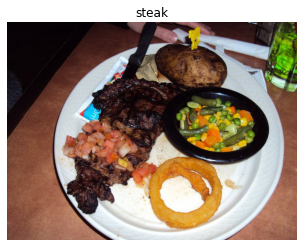

In [ ]:
viewRandImg(train_dir,random.choice(class_names))

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),
                                               class_mode='categorical', batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,target_size=(224,224),
                                             class_mode='categorical', batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           horizontal_flip=True,
                                           rotation_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.2)
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='categorical')

Found 7500 images belonging to 10 classes.


### Create model

In [ ]:
model8=Sequential([
  Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation='softmax')
])
model8.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
hist8=model8.fit(train_data,epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 76s 272ms/step - loss: 2.1557 - accuracy: 0.2036 - val_loss: 2.0341 - val_accuracy: 0.2708
Epoch 2/5
235/235 [==============================] - 71s 300ms/step - loss: 1.9052 - accuracy: 0.3411 - val_loss: 1.8451 - val_accuracy: 0.3576
Epoch 3/5
235/235 [==============================] - 86s 367ms/step - loss: 1.5295 - accuracy: 0.4888 - val_loss: 1.8682 - val_accuracy: 0.3540
Epoch 4/5
235/235 [==============================] - 65s 278ms/step - loss: 0.9365 - accuracy: 0.6968 - val_loss: 2.3092 - val_accuracy: 0.3128
Epoch 5/5
235/235 [==============================] - 56s 237ms/step - loss: 0.4288 - accuracy: 0.8653 - val_loss: 3.3085 - val_accuracy: 0.2924


In [ ]:
model8.evaluate(test_data)

79/79 [==============================] - 13s 167ms/step - loss: 3.3085 - accuracy: 0.2924


[3.3085379600524902, 0.2924000024795532]

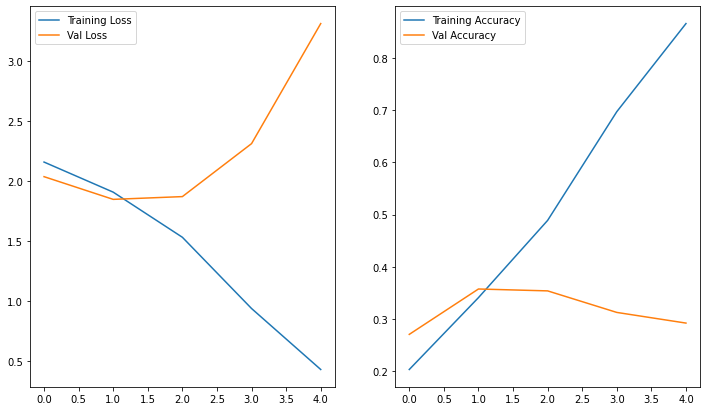

In [ ]:
plot_loss_curve(hist8)

In [ ]:
model8.save('/content/drive/MyDrive/03CNN/save_model8')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/03CNN/save_model8/assets


In [ ]:
model9=Sequential([
  Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation='softmax')
])
model9.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])
model9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
hist9=model9.fit(train_data,epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 246ms/step - loss: 1.4640 - accuracy: 0.5183 - val_loss: 1.9537 - val_accuracy: 0.3336
Epoch 2/5
235/235 [==============================] - 78s 331ms/step - loss: 1.0206 - accuracy: 0.6725 - val_loss: 2.1704 - val_accuracy: 0.3172
Epoch 3/5
235/235 [==============================] - 77s 330ms/step - loss: 0.5789 - accuracy: 0.8284 - val_loss: 2.5910 - val_accuracy: 0.3104
Epoch 4/5
235/235 [==============================] - 81s 343ms/step - loss: 0.2756 - accuracy: 0.9280 - val_loss: 2.9871 - val_accuracy: 0.3168
Epoch 5/5
235/235 [==============================] - 50s 215ms/step - loss: 0.1207 - accuracy: 0.9783 - val_loss: 3.3579 - val_accuracy: 0.3164


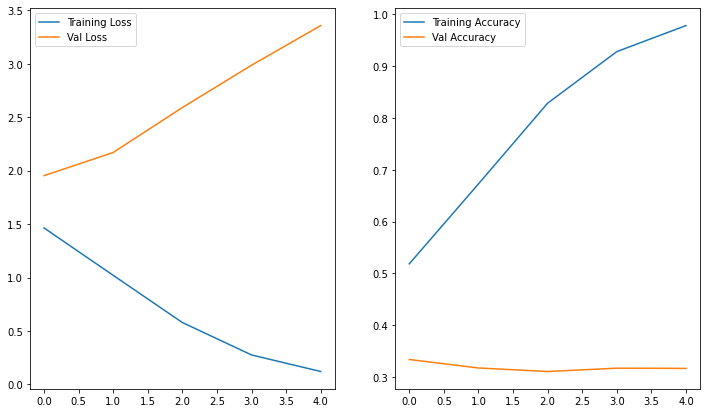

In [ ]:
plot_loss_curve(hist9)

In [ ]:
model10=tf.keras.models.clone_model(model8)
model10.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
model10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
hist10=model10.fit(train_data_augmented,epochs=5,
                   steps_per_epoch=len(train_data_augmented),
                   validation_data=test_data,
                   validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 133s 563ms/step - loss: 2.2143 - accuracy: 0.1737 - val_loss: 2.0671 - val_accuracy: 0.2536
Epoch 2/5
235/235 [==============================] - 134s 568ms/step - loss: 2.0769 - accuracy: 0.2564 - val_loss: 2.0874 - val_accuracy: 0.2540
Epoch 3/5
235/235 [==============================] - 135s 573ms/step - loss: 2.0308 - accuracy: 0.2927 - val_loss: 1.8700 - val_accuracy: 0.3452
Epoch 4/5
235/235 [==============================] - 135s 574ms/step - loss: 1.9868 - accuracy: 0.3051 - val_loss: 1.8823 - val_accuracy: 0.3376
Epoch 5/5
235/235 [==============================] - 133s 568ms/step - loss: 1.9549 - accuracy: 0.3180 - val_loss: 1.7652 - val_accuracy: 0.3964


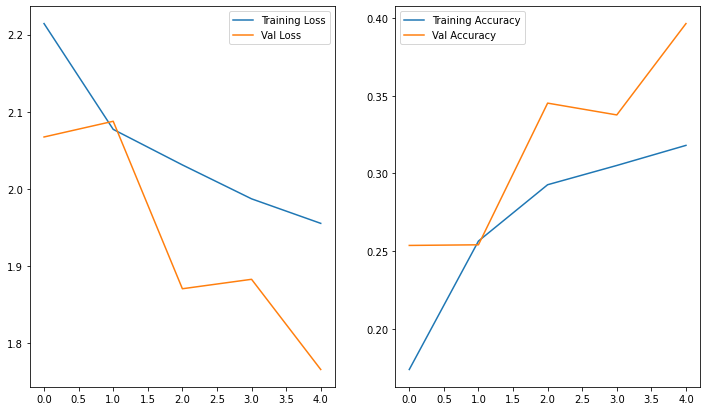

In [ ]:
plot_loss_curve(hist10)

In [ ]:
model10.save('/content/drive/MyDrive/03CNN/save_model10')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/03CNN/save_model10/assets


### Testing

--2022-04-22 11:03:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-04-22 11:03:25 (34.0 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

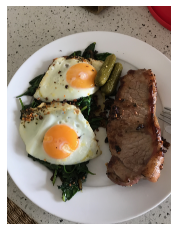

In [ ]:
import matplotlib.image as mimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

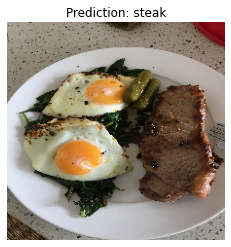

In [ ]:
plot_prediction(model10,'03-steak.jpeg',class_names)